<a href="https://colab.research.google.com/github/OverCat2000/jupyter_notebooks/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
housing = fetch_california_housing()

In [ ]:
x_train_full, x_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, test_size=0.2, shuffle=True,
    random_state=42
)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_full, y_train_full, test_size=0.2, shuffle=True,
    random_state=42
)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(x_train)
X_valid = scaler.transform(x_valid)
X_test = scaler.transform(x_test)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(X_train.shape[1:]),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

In [ ]:
model.compile(loss="mean_squared_error", optimizer="adam",
              metrics=["R2Score"])

In [ ]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    )

Epoch 1/20
413/413 [==============================] - 3s 5ms/step - loss: 1.4561 - r2_score: -0.0982 - val_loss: 1.1264 - val_r2_score: 0.1838
Epoch 2/20
413/413 [==============================] - 2s 6ms/step - loss: 0.5667 - r2_score: 0.5726 - val_loss: 0.5614 - val_r2_score: 0.5932
Epoch 3/20
413/413 [==============================] - 1s 3ms/step - loss: 0.4436 - r2_score: 0.6654 - val_loss: 0.4384 - val_r2_score: 0.6823
Epoch 4/20
413/413 [==============================] - 1s 3ms/step - loss: 0.4110 - r2_score: 0.6900 - val_loss: 0.4246 - val_r2_score: 0.6923
Epoch 5/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3984 - r2_score: 0.6995 - val_loss: 0.4233 - val_r2_score: 0.6933
Epoch 6/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3899 - r2_score: 0.7059 - val_loss: 0.4169 - val_r2_score: 0.6979
Epoch 7/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3848 - r2_score: 0.7097 - val_loss: 0.4202 - val_r2_score: 0.6955
Epoch

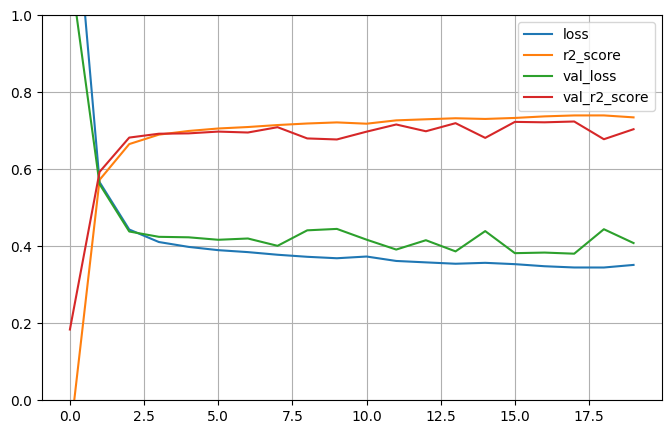

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
test_eval = model.evaluate(X_test, y_test)
train_eval = model.evaluate(X_train, y_train)

413/413 [==============================] - 1s 2ms/step - loss: 0.3429 - r2_score: 0.7413


In [ ]:
print(test_eval)
print(train_eval)

[0.3548935353755951, 0.7291734218597412]
[0.3429361879825592, 0.7413458824157715]


Wide Deep model

In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [ ]:
input_A = tf.keras.Input(X_train_A.shape[1:], name="input_A")
input_B = tf.keras.Input(X_train_B.shape[1:], name="input_B")
hidden1 = tf.keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = tf.keras.layers.Dense(10, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([input_A, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.models.Model(inputs=[input_A, input_B],
                       outputs=[output])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_B (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 dense_16 (Dense)            (None, 30)                   210       ['input_B[0][0]']             
                                                                                                  
 input_A (InputLayer)        [(None, 5)]                  0         []                            
                                                                                                  
 dense_17 (Dense)            (None, 10)                   310       ['dense_16[0][0]']            
                                                                                            

In [16]:
model.compile(loss="mse", optimizer='adam', metrics=["R2Score"])

In [17]:
history = model.fit({'input_A':X_train_A, 'input_B':X_train_B}, y_train,
                    epochs=20,
                    validation_data=({'input_A':X_valid_A, 'input_B':X_valid_B}, y_valid))

Epoch 1/20
413/413 [==============================] - 3s 3ms/step - loss: 2.9108 - r2_score: -1.1954 - val_loss: 1.1364 - val_r2_score: 0.1765
Epoch 2/20
413/413 [==============================] - 1s 3ms/step - loss: 0.8360 - r2_score: 0.3695 - val_loss: 0.7827 - val_r2_score: 0.4328
Epoch 3/20
413/413 [==============================] - 1s 3ms/step - loss: 0.6379 - r2_score: 0.5189 - val_loss: 0.6726 - val_r2_score: 0.5126
Epoch 4/20
413/413 [==============================] - 1s 3ms/step - loss: 0.5377 - r2_score: 0.5945 - val_loss: 0.5664 - val_r2_score: 0.5896
Epoch 5/20
413/413 [==============================] - 1s 3ms/step - loss: 0.4686 - r2_score: 0.6466 - val_loss: 0.4827 - val_r2_score: 0.6502
Epoch 6/20
413/413 [==============================] - 1s 3ms/step - loss: 0.4214 - r2_score: 0.6822 - val_loss: 0.5042 - val_r2_score: 0.6347
Epoch 7/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3895 - r2_score: 0.7062 - val_loss: 0.4326 - val_r2_score: 0.6865
Epoch

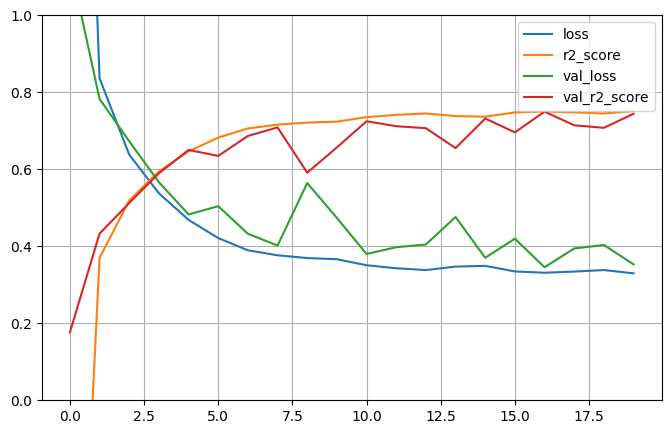

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
test_eval = model.evaluate({'input_A':X_test_A, 'input_B':X_test_B}, y_test)
train_eval = model.evaluate({'input_A':X_train_A, 'input_B':X_train_B}, y_train)

413/413 [==============================] - 1s 2ms/step - loss: 0.3241 - r2_score: 0.7555


In [20]:
print(test_eval)
print(train_eval)

[0.3400956988334656, 0.7404659390449524]
[0.32412034273147583, 0.7555374503135681]


In [21]:
y_pred = model.predict({'input_A':X_new_A, 'input_B':X_new_B})

1/1 [==============================] - 0s 106ms/step


In [22]:
y_pred

array([[0.3251035],
       [1.2097085],
       [3.8140926]], dtype=float32)